Assignment 2 - Harshal Dev(2019306) Sneh Suman(2019337)


In [ ]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=cc77704dd71ff16d16a859a30dfc965d38a0c11a4ba0ee0258c887cccd41ec2d
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import networkx as nx
import warnings
from mlxtend.frequent_patterns import association_rules
d=(50,30)
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.4 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMG A2 Dataset/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DMG A2 Dataset/ml-latest-small/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
tags = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DMG A2 Dataset/ml-latest-small/tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

**Q1**
---

In [ ]:
unique_user = ratings.userId.nunique(dropna = True)
unique_movie = ratings.movieId.nunique(dropna = True)
print("number of unique users in the dataset:")
print(unique_user)
print("number of unique movies in the dataset:")
print(unique_movie)

number of unique users in the dataset:
610
number of unique movies in the dataset:
9724


In [ ]:
ratings_total = unique_user*unique_movie
ratings_available = ratings.shape[0]
ratings_wedonthave = ratings_total - ratings_available 
print("ratings not provided means some user have not watched some movies and its given by")
print(ratings_wedonthave)

ratings not provided means some user have not watched some movies and its given by
5830804


frequency of rating like 3 and 4 are more in compare to other ratings


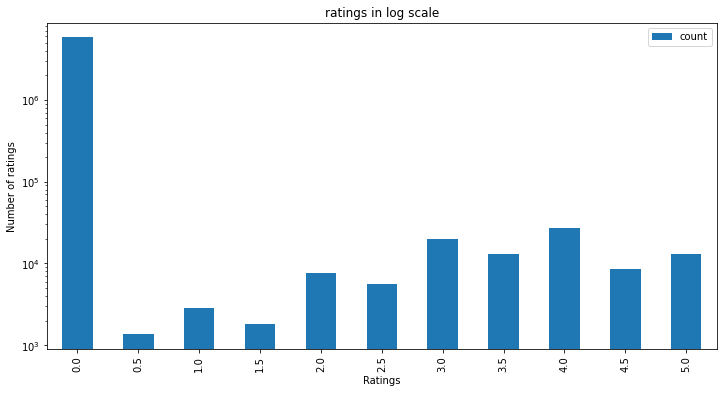

In [ ]:
#plotting ratings from 0 to 5 
rating_count = pd.DataFrame(ratings.groupby('rating').size(),columns=['count'])
rating_count
#including the ratings of 0 from this point of code
rating_count = rating_count.append(pd.DataFrame({'count':ratings_wedonthave},index = [0])).sort_index()
rating_count
de=(12,6)
#reducing the number of counts for 0 by using log 
rating_count['log_count'] = np.log(rating_count['count'])
rating_count
# plot a bar plot to visualise the ratings
rating_cnt_for_vis = rating_count
ax = rating_cnt_for_vis.reset_index().rename(columns = {'index':'rating_value'}).plot(
    x='rating_value',
    y='count',
    logy = True,
    kind='bar',
    title='ratings in log scale',
    figsize=de
)
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of ratings')
print("frequency of rating like 3 and 4 are more in compare to other ratings")

In [ ]:
# Number of ratings for each movie
f=(12,8)
gh=(12,6)
movie_freq = pd.DataFrame(ratings.groupby('movieId').size(),columns=['count'])
movie_freq.head(15)

,count
movieId,
1,215
2,110
3,52
4,7
5,49
6,102
7,54
8,8
9,16


Text(0, 0.5, 'ratings frequency')

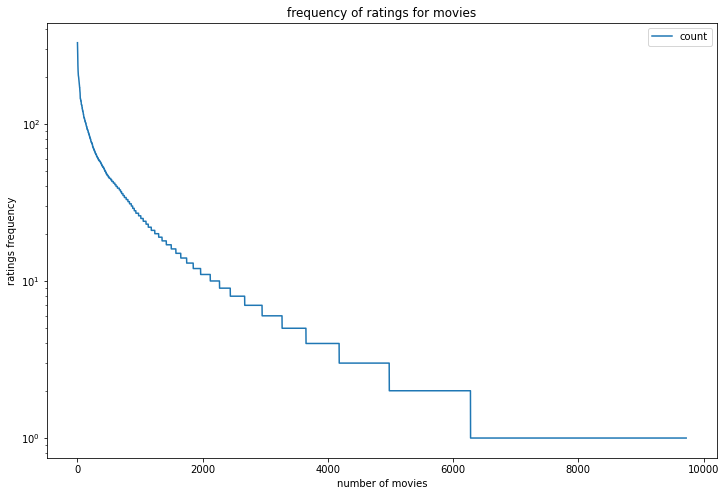

In [ ]:
# plot movie rating frequency
movie_freq_copy = movie_freq.sort_values(by='count',ascending=False)
movie_freq_copy=movie_freq_copy.reset_index(drop=True)
ax1  = movie_freq_copy.plot(
    title='frequency of ratings for movies',
    logy=True,
    figsize=f
)
ax1.set_xlabel('number of movies')
ax1.set_ylabel('ratings frequency')

In [ ]:
threshold_rating_freq = 10
a=10
g=9
import math
#Movies with less than a cent reviews are ignored
popular_movies_id = list(set(movie_freq.query('count>=@threshold_rating_freq').index))
ratings_excep=math.log(15,10)
# ratings df after dropping non popular movies
ratings_with_popular_movies = ratings[ratings.movieId.isin(popular_movies_id)]
# ratings details
print('shape of ratings:')
print(ratings.shape)
ratings_excep=math.log(15,10)
print('shape of ratings_with_popular_movies:')
print(ratings_with_popular_movies.shape)
ratings_excep=math.log(15,10)
print("no of movies which are rated more than 50 times:")
print(len(popular_movies_id))
print("no of unique movies present in dataset:")
print(unique_movie)

shape of ratings:
(100836, 4)
shape of ratings_with_popular_movies:
(81116, 4)
no of movies which are rated more than 50 times:
2269
no of unique movies present in dataset:
9724


In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 5.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619434 sha256=8628ce840606b45a6b2292bedca41d90d56631a428c3baff1623b05a236ff692
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
#number of mmovies rated by an user
user_cnt = pd.DataFrame(ratings.groupby('userId').size(),columns=['count'])
user_cnt_copy = user_cnt
user_cnt.head()

,count
userId,
1,232
2,29
3,39
4,216
5,44


Text(0, 0.5, 'frequencies for ratings')

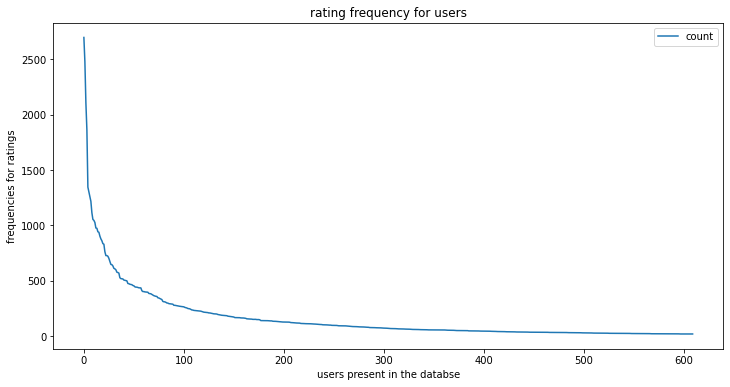

In [ ]:
# plot rating freq
ax  = user_cnt_copy.sort_values('count',ascending=False).reset_index(drop=True).plot(
      title='rating frequency for users',
      figsize=gh,
      
)
ax.set_xlabel("users present in the databse")
ax.set_ylabel("frequencies for ratings")

In [ ]:
threshold_val = 30
active_user = list(set(user_cnt.query('count>=@threshold_val').index))
# ratings updated
ratings_with_popular_movies_with_active_user = ratings_with_popular_movies[ratings_with_popular_movies.userId.isin(active_user)]
print('shape of ratings_with_popular_movies:')
print(ratings_with_popular_movies.shape)
ratings_excep=math.log(15,10)
print('shape of ratings_with_popular_movies_with_active_user:')
print(ratings_with_popular_movies_with_active_user.shape)
ratings_excep=math.log(15,10)
print("unique_user:")
print(unique_user)
ratings_excep=math.log(15,10)
print("active_user")
print(len(active_user))
ratings_excep=math.log(15,10)
print("unique_movies")
print(unique_movie)
print("popular_movies")
print(len(popular_movies_id))

shape of ratings_with_popular_movies:
(81116, 4)
shape of ratings_with_popular_movies_with_active_user:
(78712, 4)
unique_user:
610
active_user
501
unique_movies
9724
popular_movies
2269


In [ ]:
!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 3.1 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149862 sha256=b72acfacff7250b3758331981e32f7525f792541849ea9f636321f76729b2962
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
asd=609
dfg=500
dfr='white'
q='userId'
iu='movieId'
w='rating'
cv='items'
ratings=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMG A2 Dataset/ml-latest-small/ratings.csv')
movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DMG A2 Dataset/ml-latest-small/movies.csv")
ratings=pd.merge(ratings,movies,on=iu)
sns.set_style(dfr)
ratings=ratings[ratings[w]>=3]
ratings=ratings.sort_values(q)
ty=0.07
tu=0.2
th=3
yu=2
movietab = ratings.pivot_table(index=q,columns=iu,values='title',aggfunc='first')
# Preparing for Data Preprocessing
lists = []
for i in range(asd):
    temp=[]
    for j in range(dfg):
        if(str(movietab.values[i,j])!='nan'):
            temp.append(str(movietab.values[i,j]))
    lists.append(temp)
# Training Apriori on the dataset
rules = apriori(lists, min_support = ty, min_confidence = tu, min_lift = th, min_length = yu)
results = list(rules)
res=pd.DataFrame(results)
res=res[cv]
temp=[list(x) for x in res]

In [ ]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    dmn=0
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    dmn=8
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    dmn=3
    return list(zip(lhs, rhs, supports, confidences, lifts))
apriori_suggested_movies = pd.DataFrame(inspect(results),
                                  columns = ['movie_watched', 'movie_recommendation', 'Support', 'Confidence', 'Lift'])


In [ ]:
ze=0
apriori_suggested_movies.nlargest(n = 500, columns = 'Lift')
#movies_apriori.to_csv(r'Files\movies_apriori.csv', index=False, header=True)

,movie_watched,movie_recommendation,Support,Confidence,Lift
3755,Clear and Present Danger (1994),"Firm, The (1993)",0.078818,0.470588,5.848739
7992,Clear and Present Danger (1994),"Firm, The (1993)",0.078818,0.470588,5.848739
6198,Clear and Present Danger (1994),Apollo 13 (1995),0.077176,0.460784,5.612353
7988,Clear and Present Danger (1994),Die Hard: With a Vengeance (1995),0.075534,0.450980,5.605042
10443,Clear and Present Danger (1994),Crimson Tide (1995),0.073892,0.441176,5.597426
...,...,...,...,...,...
322,Sleepless in Seattle (1993),Apollo 13 (1995),0.073892,0.478723,4.164894
3411,Crimson Tide (1995),Dances with Wolves (1990),0.073892,0.478723,4.164894
6509,Crimson Tide (1995),Batman (1989),0.073892,0.478723,4.164894
3795,Clear and Present Danger (1994),Dances with Wolves (1990),0.087028,0.519608,4.163700


In [ ]:
#check for recommendation from here with help 

In [ ]:
def get_indivual_movies(org_dataset):   # call function like this -->   meri_final_list = get_indivual_movies(df)
  #original dataset = our dataset 
  movies_column = org_dataset["movies"]

  my_final_movies = []
  
  for i in range(len(movies_column)):
    temp = movies_column.iloc[i]
    z = 0
    for j in range(len(temp)):
      if(temp[j] == ')'):
        my_final_movies.append(temp[z:j+1].strip())
        z= j+1

  return my_final_movies

In [ ]:
def find(s):
    return [i for i, ltr in enumerate(s) if ltr == "\n"]

In [ ]:
def get_me_the_bloody_movie_from_the_output(s, line_number):


In [ ]:
# df_pika = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DMG A2 Dataset/mera test file.tsv", sep='\t')
df_pika = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DMG A2 Dataset/X_test_multiX4 - X_test_multiX4.tsv", sep='\t')
df_pika



,movies,recommendation
0,Jurassic Park (1993) First Kid (1996) 101 Dalm...,NaN
1,Liar Liar (1997) Anastasia (1997) Murder at 16...,NaN
2,"Clockwork Orange, A (1971) Postino, Il (1994) ...",NaN
3,Toy Story (1995) Pretty Woman (1990),NaN
4,Hoop Dreams (1994) One Flew Over the Cuckoo's ...,NaN
...,...,...
745,"Kiss Me, Guido (1997) Chasing Amy (1997) Secre...",NaN
746,"Toy Story (1995) Maltese Falcon, The (1941) Fu...",NaN
747,"Lion King, The (1994) Rock, The (1996) Net, ...",NaN
748,Ulee's Gold (1997) Michael Collins (1996) Ul...,NaN


In [ ]:
temp_dict = {'Input' : ["temp1"] , "Inference" : ["temp2"]}
output_df = pd.DataFrame(temp_dict)
print(output_df)

movie_matrix = ratings.pivot_table(index=q, columns='title', values=w)
movie_matrix.head()
"""Assumption 1-putting 0 to the recommendations values which were not provided by the users"""
movie_matrix.fillna(ze,inplace=True)
"""Movie search"""
# Add the file handling here
# File handling 
# input.csv
# df = pd.read_csv("")
# output.csv
cb=True
hb=False
lk=0.01
ll=2
dx=1
dzs=0.6
iii='ignore'
fj='inner'
iij='fivethirtyeight'
sneh_op = get_indivual_movies(df_pika)
my_final_output_str = ""

for index in range(len(sneh_op)):
  my_movie = str(sneh_op[index])

  if(my_movie == "Mad City (1997)" or my_movie == "Get on the Bus (1996)" or my_movie == "Amateur (1994)"):
    continue

  my_movie_exists_or_not = my_movie in movies['title'].values

  if(my_movie_exists_or_not == False): # means my_movie doesnt exists in our movie database
      print("this movie is not in our MOVIES.CSV dataset = ", my_movie)
      continue
  
  
  recommended_movies = []
  
  try :
    mo_user_rating_rel = movie_matrix[str(sneh_op[index])]
  except:
    continue
  
  
  mo_user_rating_rel.dropna(inplace=True)
  """Getting recommendations"""
  mov_sim_mo = movie_matrix.corrwith(mo_user_rating_rel)
  mov_sim_mo.head()
  """getting the top four movies"""
  recom_mov = pd.DataFrame(mov_sim_mo, columns=['rating_relative'])
  recom_mov.dropna(inplace=cb)
  recom_mov = recom_mov.sort_values(by='rating_relative', ascending=(hb))
  # print(recom_mov.head(5))
  

  print(recom_mov.head(5))
  # recom_mov.to_csv(r'movies_apriori.csv', index=False, header=True)
  my_my_list = find(str(recom_mov.head(5)))
  my_my_list.append(len(str(recom_mov.head(5))))
  temp_str = str(recom_mov.head(5))

  for x in range(len(my_my_list) -1):
    substrrrrrr = temp_str[my_my_list[x]:my_my_list[x+1]]
    indexof_brac = substrrrrrr.find(")")
    if(indexof_brac == -1):
      continue
    # print("substrrrrrr == ", substrrrrrr[:indexof_brac])
    finally_movie = str(substrrrrrr[:indexof_brac+1].strip())
    print(finally_movie)
    recommended_movies.append(finally_movie)
    # print(indexof_brac)
  
  # print(recommended_movies)
  del recommended_movies[0]
  print(recommended_movies)
  

  
  print("----------")
  # print("mymy list = ")
  # print(my_my_list)
  print("----------")
  my_final_output_str += str(recom_mov.head(5))
  # print("col = ", recom_mov.columns)
  # print(type(recom_mov))
  print("----------------------------")
  my_final_output_str += "=============================="
  tempDf = pd.DataFrame(columns = ['Input', 'Inference'])
  tempDf['Input'] = str(sneh_op[index])
  print("checking = ", str(sneh_op[index]))
  # recommended_movies =  str(recom_mov.iloc[1]) +", " + str(recom_mov.iloc[2]) +", " + str(recom_mov.iloc[3]) +", " + str(recom_mov.iloc[4])
  # print(recommended_movies.find("\n"))
  
  # print()
  # print(recommended_movies[56:])
  my_answer_Str = ""
  for output_movie in recommended_movies:
    my_answer_Str = my_answer_Str + ", " + str(output_movie) + ", "
   
  print("my ans str = ", my_answer_Str)

  tempDf['Inference'] = my_answer_Str
  print("****************")
  print(tempDf)
  print("****************")
  output_df = pd.concat([output_df,tempDf])
  my_string = ','.join(recommended_movies)
  # df2 = {'Input': str(sneh_op[index]), 'Inference': recommended_movies}
  df2 = {'Input': str(sneh_op[index]), 'Inference': my_string}
  
  output_df = output_df.append(df2, ignore_index = True)
  print("----------------------------")
  my_final_output_str += "=============================="
  
  

Streaming output truncated to the last 5000 lines.
checking =  Conspiracy Theory (1997)
my ans str =  , Cocoon (1985), , Entrapment (1999), , Fallen (1998), , G.I. Jane (1997), 
****************
Empty DataFrame
Columns: [Input, Inference]
Index: []
****************
----------------------------
                          rating_relative
title                                    
Air Force One (1997)             1.000000
Peacemaker, The (1997)           0.463934
Jackal, The (1997)               0.417758
Con Air (1997)                   0.415485
Starship Troopers (1997)         0.408642
Air Force One (1997)
Peacemaker, The (1997)
Jackal, The (1997)
Con Air (1997)
Starship Troopers (1997)
['Peacemaker, The (1997)', 'Jackal, The (1997)', 'Con Air (1997)', 'Starship Troopers (1997)']
----------
----------
----------------------------
checking =  Air Force One (1997)
my ans str =  , Peacemaker, The (1997), , Jackal, The (1997), , Con Air (1997), , Starship Troopers (1997), 
****************
Emp

In [ ]:
output_df

,Input,Inference
0,temp1,temp2
1,Jurassic Park (1993),"Terminator 2: Judgment Day (1991),Fugitive, Th..."
2,First Kid (1996),"Quest, The (1996),Chamber, The (1996),Big Gree..."
3,101 Dalmatians (1996),"Jack (1996),Borrowers, The (1997),Dracula: Dea..."
4,Homeward Bound: The Incredible Journey (1993),"Matilda (1996),Angels in the Outfield (1994),C..."
...,...,...
2020,Ulee's Gold (1997),Entertaining Angels: The Dorothy Day Story (19...
2021,Lawrence of Arabia (1962),"2001: A Space Odyssey (1968),Killing Fields, T..."
2022,"Godfather, The (1972)","Godfather: Part II, The (1974),Goodfellas (199..."
2023,"Killing Fields, The (1984)","Manchurian Candidate, The (1962),Dead Men Don'..."


In [ ]:
#dropping the first row cuz it a buffer/fake row added for my ease
updated_df = output_df.iloc[1: , :]
updated_df

,Input,Inference
1,Jurassic Park (1993),"Terminator 2: Judgment Day (1991),Fugitive, Th..."
2,First Kid (1996),"Quest, The (1996),Chamber, The (1996),Big Gree..."
3,101 Dalmatians (1996),"Jack (1996),Borrowers, The (1997),Dracula: Dea..."
4,Homeward Bound: The Incredible Journey (1993),"Matilda (1996),Angels in the Outfield (1994),C..."
5,Liar Liar (1997),"Men in Black (a.k.a. MIB),Meet the Parents (20..."
...,...,...
2020,Ulee's Gold (1997),Entertaining Angels: The Dorothy Day Story (19...
2021,Lawrence of Arabia (1962),"2001: A Space Odyssey (1968),Killing Fields, T..."
2022,"Godfather, The (1972)","Godfather: Part II, The (1974),Goodfellas (199..."
2023,"Killing Fields, The (1984)","Manchurian Candidate, The (1962),Dead Men Don'..."


In [ ]:
# saving the dataframe
updated_df.to_csv('output.csv')

In [ ]:
my_final_output_str

"                                   rating_relative\ntitle                                             \nJurassic Park (1993)                      1.000000\nTerminator 2: Judgment Day (1991)         0.531701\nFugitive, The (1993)                      0.501345\nSpeed (1994)                              0.485194\nBraveheart (1995)                         0.459542============================================================                        rating_relative\ntitle                                  \nFirst Kid (1996)               1.000000\nQuest, The (1996)              0.753897\nChamber, The (1996)            0.727721\nBig Green, The (1995)          0.706525\nLive Nude Girls (1995)         0.706525============================================================                                    rating_relative\ntitle                                              \n101 Dalmatians (1996)                      1.000000\nJack (1996)                                0.382350\nBorrowers, The (1997

Q3 

In [ ]:
merge = movies.merge(tags,on = 'movieId',how = fj)
merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [ ]:
merge.drop(columns=['timestamp','tag'],inplace=True)
merge

,movieId,title,genres,userId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567
3,2,Jumanji (1995),Adventure|Children|Fantasy,62
4,2,Jumanji (1995),Adventure|Children|Fantasy,62
...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184


In [ ]:
merge_list = merge.groupby(by = ["userId"])["title"].apply(list).reset_index()
merge_list.head()

,userId,title
0,2,"[Step Brothers (2008), Step Brothers (2008), S..."
1,7,"[Departed, The (2006)]"
2,18,"[Carlito's Way (1993), Carlito's Way (1993), C..."
3,21,"[My Best Friend's Wedding (1997), My Best Frie..."
4,49,"[Interstellar (2014), Interstellar (2014), Int..."


In [ ]:
merge_list = merge_list["title"].tolist()
merge_list[0:3]

[['Step Brothers (2008)',
  'Step Brothers (2008)',
  'Step Brothers (2008)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)'],
 ['Departed, The (2006)'],
 ["Carlito's Way (1993)",
  "Carlito's Way (1993)",
  "Carlito's Way (1993)",
  'Godfather: Part II, The (1974)',
  'Godfather: Part II, The (1974)',
  'Pianist, The (2002)',
  'Pianist, The (2002)',
  'Lucky Number Slevin (2006)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Just Eat It: A Food Waste Story (2014)',
  'Just Eat It: A Food Waste Story (2014)']]

In [ ]:
dd=(50,30)
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),2001: A Space Odyssey (1968),21 Grams (2003),25th Hour (2002),28 Days Later (2002),"39 Steps, The (1935)",3:10 to Yuma (2007),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",42 Up (1998),84 Charing Cross Road (1987),8MM (1999),A Million Ways to Die in the West (2014),A Pigeon Sat on a Branch Reflecting on Existence (2014),A Story of Children and Film (2013),A.I. Artificial Intelligence (2001),About a Boy (2002),"Accused, The (1988)",Adam's Rib (1949),Addams Family Values (1993),"Addams Family, The (1991)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","African Queen, The (1951)",After the Thin Man (1936),"Age of Innocence, The (1993)",Air Force One (1997),Airheads (1994),Airplane! (1980),Akira (1988),Aladdin (1992),Alfie (1966),Alice Adams (1935),Alice Doesn't Live Here Anymore (1974),Alice in Wonderland (1951),Alien (1979),Aliens (1986),Alive (1993),All About Eve (1950),All the King's Men (1949),All the President's Men (1976),All the Real Girls (2003),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Amen. (2002),America's Sweethearts (2001),American Gangster (2007),American History X (1998),American Movie (1999),American Pie (1999),"American President, The (1995)",American Splendor (2003),"American in Paris, An (1951)","Americanization of Emily, The (1964)",Anastasia (1956),Anatomy of a Murder (1959),Anchorman 2: The Legend Continues (2013),Anchorman: The Legend of Ron Burgundy (2004),And Then There Were None (1945),And the Band Played On (1993),"Andalusian Dog, An (Chien andalou, Un) (1929)",Angel's Egg (Tenshi no tamago) (1985),Angie (1994),Animal House (1978),"Animatrix, The (2003)",Anna Karenina (1997),Anne Frank Remembered (1995),Anne of the Thousand Days (1969),Annie Hall (1977),Another Thin Man (1939),"Apartment, The (1960)",Apocalypse Now (1979),Apollo 13 (1995),Arachnophobia (1990),Argo (2012),"Aristocats, The (1970)",Armageddon (1998),Around the World in 80 Days (1956),Arrival (2016),"Arrival, The (1996)",Arsenic and Old Lace (1944),"Astronaut's Wife, The (1999)",Au Hasard Balthazar (1966),Auntie Mame (1958),Avalon (1990),Avatar (2009),"Avengers, The (2012)",Avengers: Infinity War - Part I (2018),"Aviator, The (2004)","Awful Truth, The (1937)","Babadook, The (2014)",Babe (1995),Babel (2006),Babette's Feast (Babettes gæstebud) (1987),Babylon 5: In the Beginning (1998),"Bachelor and the Bobby-Soxer, The (1947)",Back to the Future (1985),Back to the Future Part II (1989),Bad Day at Black Rock (1955),"Bad News Bears, The (1976)","Bad Seed, The (1956)","Bad and the Beautiful, The (1952)","Ballad of Jack and Rose, The (2005)","Bank Job, The (2008)",Barton Fink (1991),"Basketball Diaries, The (1995)",Batman (1989),Batman Forever (1995),Batman Returns (1992),Batman v Superman: Dawn of Justice (2016),Battle Royale (Batoru rowaiaru) (2000),"Battle of Algiers, The (La battaglia di Algeri) (1966)",Beasts of No Nation (2015),Beasts of the Southern Wild (2012),Beat the Devil (1953),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Before Sunrise (1995),Before Sunset (2004),Begotten (1990),Being Julia (2004),Being There (1979),"Believer, The (2001)",Bend It Like Beckham (2002),Benny & Joon (1993),Best in Show (2000),Better Luck Tomorrow (2002),Better Off Dead... (1985),Beyond Silence (Jenseits der Stille) (1996),Big (1988),Big Business (1988),Big Daddy (1999),Big Eyes (2014),Big Fish (2003),Big Hero 6 (2014),"Big Kahuna, The (2000)","Big Lebowski, The (1998)",Big Night (1996),"Big Short, The (2015)","Big Sleep, The (1946)",Big Top Pee-Wee (1988),Bill & Ted's Bogus Journey (1991),Bill & Ted's Excellent Adventure (1989

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=lk, use_colnames=cb,max_len=ll)
fpgrowth_frequent_itemsets.head()

TypeError: ignored

In [ ]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

In [ ]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

In [ ]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] > dx)
                          & (fpgrowth_frequent_itemsets['support'] > dzs)].head()

In [ ]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] != dx)]

In [ ]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: 'Aladdin (1992)' in str(x))]

In [ ]:
xcz='antecedents'
rules = association_rules(fpgrowth_frequent_itemsets,metric="lift",min_threshold=(lk*3))

In [ ]:
rules

In [ ]:
rules[rules[xcz].apply(lambda x: "Aladdin (1992)" in str(x))].sort_values(ascending=False,by='lift')


In [ ]:
rules[rules[xcz].apply(lambda x: "Aladdin (1992)" in str(x))].groupby(
    [xcz, 'consequents'])[['lift']].max().sort_values(ascending=True,by='lift').head(10)

In [ ]:
dff=2000
dcv=False
rules[xcz] = rules.antecedents.apply(lambda x: next(iter(x)))
rules['consequents'] = rules.consequents.apply(lambda x: next(iter(x)))
dd=(50,90)

In [ ]:
def mirror(X):
  return X

In [ ]:
def one():
  return 1

In [ ]:
def zero():
  return one() - one()

In [ ]:
zero()

In [ ]:
movie_matrix 
plt.style.use(iij)
warnings.filterwarnings(iii)
movies
plt.style.use(iij)
edges = nx.from_pandas_edgelist(rules.sort_values(ascending=dcv,by='lift').head(100),source=xcz,target='consequents',edge_attr=None)
dd=(50,90)
plt.subplots(figsize=d)
plt.suptitle('fpgrowth table visual', fontsize = 50,fontweight = 'bold')
pos = nx.planar_layout(edges)
nx.draw_networkx_nodes(edges, pos, node_size = dff,alpha= 0.7,node_color = 'tomato')
nx.draw_networkx_edges(edges, pos, width = 6, alpha = 0.2, edge_color = 'indigo')
nx.draw_networkx_labels(edges, pos, font_size = 12, font_family='sans-serif', font_weight='normal')
plt.grid()
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
plt.savefig('graph.png')